In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('C:\\Users\\singh\\Downloads\\train.csv')

In [3]:
df.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [4]:
df.dtypes

Accident_ID                                     int64
Police_Force                                    int64
Number_of_Vehicles                              int64
Number_of_Casualties                            int64
Date                                           object
Day_of_Week                                     int64
Time                                           object
Local_Authority_(District)                      int64
Local_Authority_(Highway)                      object
1st_Road_Class                                  int64
1st_Road_Number                                 int64
Road_Type                                      object
Speed_limit                                     int64
2nd_Road_Class                                  int64
2nd_Road_Number                                 int64
Pedestrian_Crossing-Human_Control              object
Pedestrian_Crossing-Physical_Facilities        object
Light_Conditions                               object
Weather_Conditions          

In [5]:
#total number of records
df.size

12926007

In [6]:
#counting the number of different data types 
df.dtypes.value_counts()

object    15
int64     12
dtype: int64

In [7]:
df.isnull().sum()

Accident_ID                                      0
Police_Force                                     0
Number_of_Vehicles                               0
Number_of_Casualties                             0
Date                                             0
Day_of_Week                                      0
Time                                            14
Local_Authority_(District)                       0
Local_Authority_(Highway)                        0
1st_Road_Class                                   0
1st_Road_Number                                  0
Road_Type                                        0
Speed_limit                                      0
2nd_Road_Class                                   0
2nd_Road_Number                                  0
Pedestrian_Crossing-Human_Control                0
Pedestrian_Crossing-Physical_Facilities          0
Light_Conditions                                 0
Weather_Conditions                               0
Road_Surface_Conditions        

In [8]:
df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0], inplace=True)
df['Special_Conditions_at_Site'].fillna(df['Special_Conditions_at_Site'].mode()[0], inplace=True)
df['Time'].fillna(df['Time'].mode()[0], inplace=True)

In [9]:
df.drop(['2nd_Road_Class'],axis=1,inplace=True)
df.drop(['2nd_Road_Number'],axis=1,inplace=True)
df.drop(['1st_Road_Class'],axis=1,inplace=True)
df.drop(['1st_Road_Number'],axis=1,inplace=True)

In [13]:
df['Date'].value_counts()

23/02/12    5390
17/01/12    5226
19/01/12    5026
28/01/12    4681
24/02/12    4612
            ... 
28/10/12     129
10/06/12     125
16/09/12     122
05/08/12     122
13/08/12     120
Name: Date, Length: 366, dtype: int64

In [14]:
df['Weather_Conditions'].value_counts()

Fine without high winds       379429
Raining without high winds     53708
Raining with high winds        20326
Fine with high winds           14714
Snowing without high winds      4608
Other                           4531
Fog or mist                     1058
Snowing with high winds          249
Unknown                          118
Name: Weather_Conditions, dtype: int64

In [15]:
df['Road_Type'].value_counts()

Single carriageway    372554
Dual carriageway       52783
Roundabout             28541
One way street         24311
Slip road                523
Unknown                   29
Name: Road_Type, dtype: int64

In [16]:
df['Special_Conditions_at_Site'].value_counts()

None                                               427902
Roadworks                                           45252
Ol or diesel                                         1371
Road surface defective                               1289
Mud                                                  1104
Auto traffic singal out                               885
Permanent sign or marking defective or obscured       660
Auto traffic signal partly defective                  278
Name: Special_Conditions_at_Site, dtype: int64

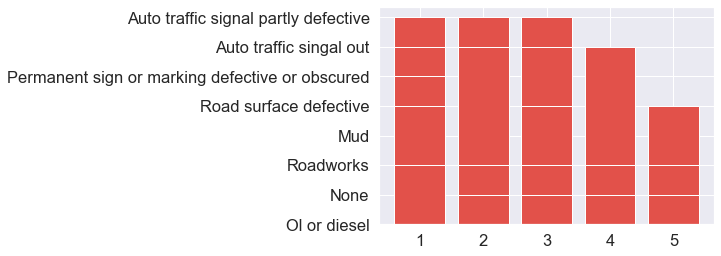

In [17]:
n= df['Number_of_Casualties'].head(10000)
p = df['Special_Conditions_at_Site'].head(10000)
 
# Figure Size
 
# Horizontal Bar Plot
plt.bar(n,p)
 
# Show Plot
plt.show()

<AxesSubplot:>

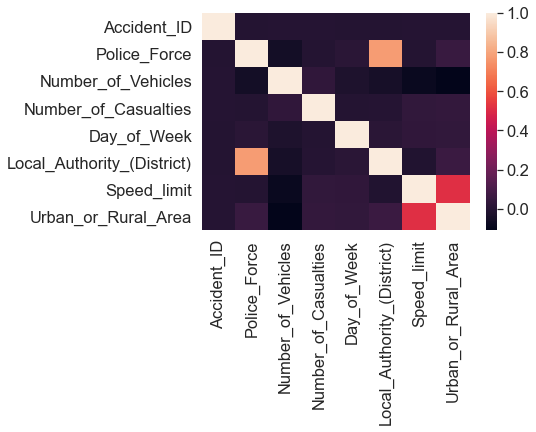

In [18]:
corr = df.corr()
plt.subplots()
sns.heatmap(corr)

In [19]:
#after replacing the null values with mode 
df.isnull().sum()

Accident_ID                                    0
Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
state               

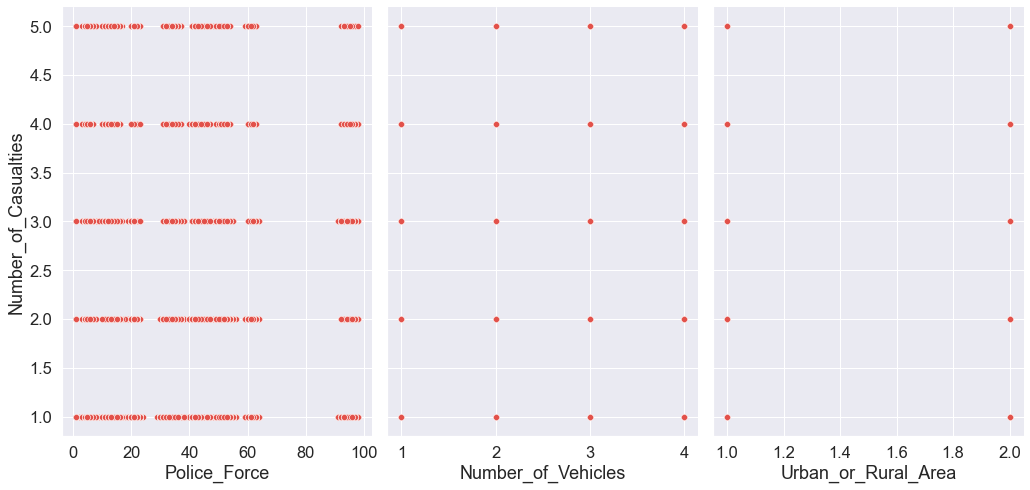

In [20]:
p = sns.pairplot(df, x_vars=['Police_Force','Number_of_Vehicles','Urban_or_Rural_Area'], y_vars='Number_of_Casualties', size=7, aspect=0.7)

In [22]:
#Plots
#num_atr --> Numerical attributes
#cat_atr --> Categorical attributes
num_atr=['Accident_ID','Police_Force','Number_of_Vehicles','Number_of_Casualties','Day_of_Week','Speed_limit','Urban_or_Rural_Area']

cat_atr=['Date','Time','Road_Type','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Special_Conditions_at_Site','Carriageway_Hazards','state','postcode']

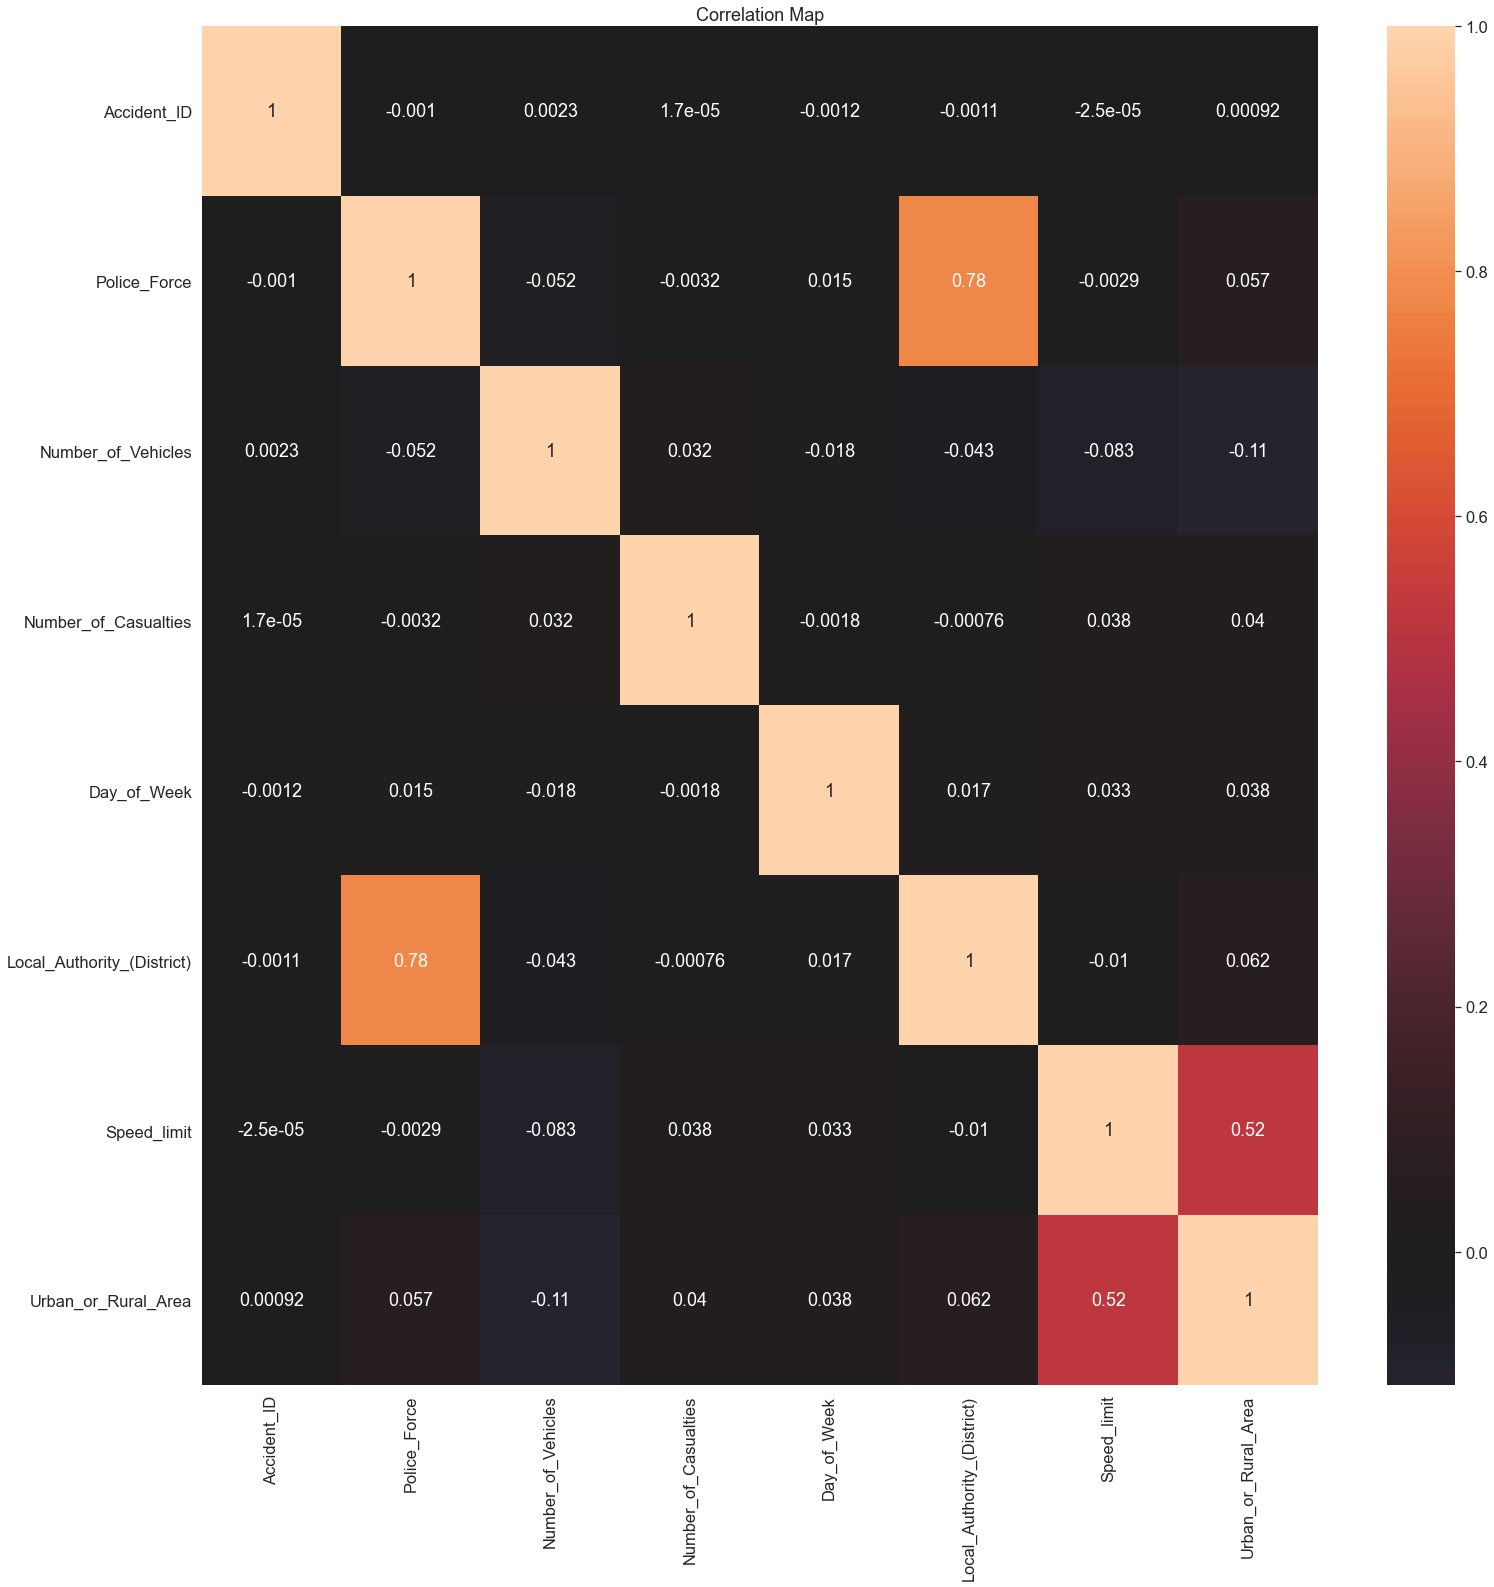

In [23]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [26]:
from sklearn.model_selection import train_test_split
X= df.drop(['country'],axis=1)
y= df['country']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15)

In [27]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_train[num_atr] = ss.fit_transform(X_train[num_atr])

In [28]:
X_train[num_atr].head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area
142452,-0.701227,-1.026179,0.406424,-0.568691,-0.196515,-0.547717,-0.819746
203164,-0.262197,0.417252,0.406424,-0.568691,1.405380,-0.547717,-0.819746
171927,-0.488172,-0.424749,0.406424,-0.568691,0.337450,-0.547717,1.219890
170452,-0.499096,0.136585,-1.190287,-0.568691,0.871415,1.786181,1.219890
281405,0.303159,-1.226655,0.406424,-0.568691,0.337450,-0.547717,-0.819746


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

In [30]:
X_train[cat_atr].head()

,Date,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,state,postcode
142452,104,584,2,4,1,0,3,3,2,66709
203164,99,74,2,4,1,0,3,3,2,28798
171927,276,199,3,4,5,0,3,3,2,49141
170452,248,164,3,4,1,3,3,3,2,24604
281405,140,504,3,4,5,4,3,3,2,78014


In [33]:
#a = pd.DataFrame(X_train[cat_atr])
#b = pd.DataFrame(X_train[num_atr])
a=X_train[cat_atr]
b=X_train[num_atr]
#b = ss.transform(price[num_atr])
print (a.head())
print (b.head())

        Date  Time  Road_Type  Light_Conditions  Weather_Conditions  \
142452   104   584          2                 4                   1   
203164    99    74          2                 4                   1   
171927   276   199          3                 4                   5   
170452   248   164          3                 4                   1   
281405   140   504          3                 4                   5   

        Road_Surface_Conditions  Special_Conditions_at_Site  \
142452                        0                           3   
203164                        0                           3   
171927                        0                           3   
170452                        3                           3   
281405                        4                           3   

        Carriageway_Hazards  state  postcode  
142452                    3      2     66709  
203164                    3      2     28798  
171927                    3      2     49141  
170452

In [34]:
Xtr = pd.concat([a,b], axis=1)

In [35]:
Xtr.head()

,Date,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,state,postcode,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit,Urban_or_Rural_Area
142452,104,584,2,4,1,0,3,3,2,66709,-0.701227,-1.026179,0.406424,-0.568691,-0.196515,-0.547717,-0.819746
203164,99,74,2,4,1,0,3,3,2,28798,-0.262197,0.417252,0.406424,-0.568691,1.405380,-0.547717,-0.819746
171927,276,199,3,4,5,0,3,3,2,49141,-0.488172,-0.424749,0.406424,-0.568691,0.337450,-0.547717,1.219890
170452,248,164,3,4,1,3,3,3,2,24604,-0.499096,0.136585,-1.190287,-0.568691,0.871415,1.786181,1.219890
281405,140,504,3,4,5,4,3,3,2,78014,0.303159,-1.226655,0.406424,-0.568691,0.337450,-0.547717,-0.819746


In [39]:
s = np.array(df['country'])
f = s.astype(float)

ValueError: could not convert string to float: 'United Kingdom'

In [36]:
y_train.head()

142452    United Kingdom
203164    United Kingdom
171927    United Kingdom
170452    United Kingdom
281405    United Kingdom
Name: country, dtype: object

In [37]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [38]:
# fit the model using the training data and training targets
reg.fit(Xtr, y_train)

ValueError: could not convert string to float: 'United Kingdom'